In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('corr_data_45.csv')
df

,Unnamed: 0,index,is_baseline_formation,form_first_discharge_capacity_below_3p2v_ah,form_last_charge_voltage_after_1s,form_last_charge_voltage_after_10s,form_last_charge_voltage_after_60s,form_first_charge_capacity_ah,form_first_discharge_capacity_ah,form_first_cycle_efficiency,...,esoh_c365_LLI,esoh_c365_LAM_PE,esoh_c365_LAM_NE,esoh_c365_C20_loss,esoh_c365_Cn_pf,esoh_c365_x100_pf,esoh_c365_CnCp,swelling_severity,thickness_mm,electrolyte_weight_g
0,0,0,1,0.077820,3.393505,3.403936,3.420587,2.755302,2.312734,0.839376,...,0.742459,0.154351,0.260098,0.764000,2.791033,0.740103,0.907880,0,3.4940,11.06
1,1,1,1,0.073791,3.401924,3.412256,3.428007,2.698299,2.313851,0.857522,...,0.698183,0.159386,0.289098,0.718254,1.688931,1.084961,0.876991,0,3.8016,11.00
2,2,2,1,0.074725,3.398755,3.409052,3.424840,2.713403,2.309945,0.851309,...,0.809959,0.118393,0.173885,0.832669,3.147112,0.720362,0.960807,1,7.0644,11.01
3,3,3,1,0.069433,3.400189,3.410498,3.426320,2.696613,2.310417,0.856785,...,0.751171,0.155783,0.264744,0.772000,1.942585,1.019755,0.912329,0,3.4424,11.03
4,4,4,1,0.073127,3.396888,3.407243,3.423244,2.713639,2.330587,0.858842,...,0.756184,0.147339,0.244690,0.778656,2.952577,0.726498,0.917487,0,3.5810,11.02
5,5,5,1,0.071483,3.390003,3.400409,3.417710,2.711829,2.307558,0.850923,...,0.799429,0.133520,0.205831,0.820000,2.832990,0.775674,0.947742,1,5.1199,10.98
6,6,6,1,0.076523,3.393098,3.403509,3.420330,2.755931,2.319138,0.841508,...,0.742039,0.168518,0.266069,0.761905,2.906523,0.720198,0.904665,0,3.4969,11.05
7,7,7,1,0.066771,3.399974,3.410239,3.425883,2.707419,2.340709,0.864554,...,0.743408,0.158597,0.262210,0.758893,3.088161,0.686248,0.902413,0,3.5653,11.15
8,8,8,1,0.070995,3.398022,3.408259,3.424495,2.688354,2.337044,0.869321,...,0.769324,0.146951,0.238605,0.788000,2.967717,0.724781,0.911778,1,3.9121,11.13
9,9,29,0,0.025480,3.236701,3.371778,3.447327,2.726494,0.467856,0.171596,...,0.831989,0.106755,0.125549,0.847390,2.942917,0.768262,0.976891,3,3.5843,11.12


In [9]:
df=df.drop(columns=['Unnamed: 0','index'])
df

,is_baseline_formation,form_first_discharge_capacity_below_3p2v_ah,form_last_charge_voltage_after_1s,form_last_charge_voltage_after_10s,form_last_charge_voltage_after_60s,form_first_charge_capacity_ah,form_first_discharge_capacity_ah,form_first_cycle_efficiency,form_final_discharge_capacity_ah,form_6hr_rest_delta_voltage_v_0_to_1_hr,...,esoh_c365_LLI,esoh_c365_LAM_PE,esoh_c365_LAM_NE,esoh_c365_C20_loss,esoh_c365_Cn_pf,esoh_c365_x100_pf,esoh_c365_CnCp,swelling_severity,thickness_mm,electrolyte_weight_g
0,1,0.077820,3.393505,3.403936,3.420587,2.755302,2.312734,0.839376,2.367225,0.011104,...,0.742459,0.154351,0.260098,0.764000,2.791033,0.740103,0.907880,0,3.4940,11.06
1,1,0.073791,3.401924,3.412256,3.428007,2.698299,2.313851,0.857522,2.363418,0.010694,...,0.698183,0.159386,0.289098,0.718254,1.688931,1.084961,0.876991,0,3.8016,11.00
2,1,0.074725,3.398755,3.409052,3.424840,2.713403,2.309945,0.851309,2.362668,0.011531,...,0.809959,0.118393,0.173885,0.832669,3.147112,0.720362,0.960807,1,7.0644,11.01
3,1,0.069433,3.400189,3.410498,3.426320,2.696613,2.310417,0.856785,2.356018,0.010730,...,0.751171,0.155783,0.264744,0.772000,1.942585,1.019755,0.912329,0,3.4424,11.03
4,1,0.073127,3.396888,3.407243,3.423244,2.713639,2.330587,0.858842,2.381257,0.011573,...,0.756184,0.147339,0.244690,0.778656,2.952577,0.726498,0.917487,0,3.5810,11.02
5,1,0.071483,3.390003,3.400409,3.417710,2.711829,2.307558,0.850923,2.355594,0.010877,...,0.799429,0.133520,0.205831,0.820000,2.832990,0.775674,0.947742,1,5.1199,10.98
6,1,0.076523,3.393098,3.403509,3.420330,2.755931,2.319138,0.841508,2.371946,0.011889,...,0.742039,0.168518,0.266069,0.761905,2.906523,0.720198,0.904665,0,3.4969,11.05
7,1,0.066771,3.399974,3.410239,3.425883,2.707419,2.340709,0.864554,2.382960,0.011654,...,0.743408,0.158597,0.262210,0.758893,3.088161,0.686248,0.902413,0,3.5653,11.15
8,1,0.070995,3.398022,3.408259,3.424495,2.688354,2.337044,0.869321,2.384860,0.010998,...,0.769324,0.146951,0.238605,0.788000,2.967717,0.724781,0.911778,1,3.9121,11.13
9,0,0.025480,3.236701,3.371778,3.447327,2.726494,0.467856,0.171596,2.352179,0.012492,...,0.831989,0.106755,0.125549,0.847390,2.942917,0.768262,0.976891,3,3.5843,11.12


In [10]:
input_data=pd.DataFrame()
for i in df.columns:
    if df[i].nunique()<4:
        input_data[i]=df[i]
        df.drop(columns=[i],inplace=True)
input_data

,is_baseline_formation,swelling_severity
0,1,0
1,1,0
2,1,1
3,1,0
4,1,0
5,1,1
6,1,0
7,1,0
8,1,1
9,0,3


In [11]:
target= df[['cycles_to_50_pct', 'cycles_to_60_pct', 'cycles_to_70_pct', 'cycles_to_80_pct']]
df.drop(columns=['cycles_to_50_pct', 'cycles_to_60_pct', 'cycles_to_70_pct', 'cycles_to_80_pct'],inplace=True)
target

,cycles_to_50_pct,cycles_to_60_pct,cycles_to_70_pct,cycles_to_80_pct
0,400,391,373,328
1,401,368,338,314
2,520,498,455,386
3,389,381,363,315
4,405,400,381,333
5,430,422,405,355
6,419,408,362,336
7,412,402,362,340
8,432,421,378,339
9,496,478,461,385


In [12]:
for n_components in range(1,8):
    pca = PCA(n_components=n_components)
    pca_componenets = pca.fit_transform(df)
    explained_variance = pca.explained_variance_ratio_
    print("Number of components:",n_components)
    print("Explained Variance Ratio:", explained_variance)
    print("Total Variance Captured:", sum(explained_variance))

    '''plt.figure(figsize=(6, 4))
    plt.bar(range(1, n_components+1), explained_variance, alpha=0.7, align='center', label='Individual Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.title('Explained Variance by Each Principal Component')
    plt.legend()
    plt.show()'''
    print()



Number of components: 1
Explained Variance Ratio: [0.96825819]
Total Variance Captured: 0.968258194848964

Number of components: 2
Explained Variance Ratio: [0.96825819 0.01449147]
Total Variance Captured: 0.9827496682474262

Number of components: 3
Explained Variance Ratio: [0.96825819 0.01449147 0.00568226]
Total Variance Captured: 0.9884319284982688

Number of components: 4
Explained Variance Ratio: [0.96825819 0.01449147 0.00568226 0.00475445]
Total Variance Captured: 0.9931863791467929

Number of components: 5
Explained Variance Ratio: [0.96825819 0.01449147 0.00568226 0.00475445 0.00335945]
Total Variance Captured: 0.9965458281275837

Number of components: 6
Explained Variance Ratio: [0.96825819 0.01449147 0.00568226 0.00475445 0.00335945 0.00199907]
Total Variance Captured: 0.9985448988554169

Number of components: 7
Explained Variance Ratio: [9.68258195e-01 1.44914734e-02 5.68226025e-03 4.75445065e-03
 3.35944898e-03 1.99907073e-03 8.17052257e-04]
Total Variance Captured: 0.999

Number of components: 4
Explained Variance Ratio: [0.96825819 0.01449147 0.00568226 0.00475445]
Total Variance Captured: 0.9931863791467929


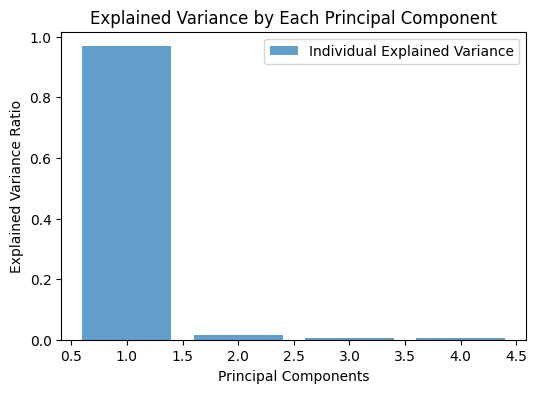

,PC1,PC2,PC3,PC4
0,-116.897780,6.409425,11.353424,2.595030
1,-149.129752,0.028200,-2.075101,-2.558736
2,34.564947,20.924337,-7.950795,-5.635809
3,-145.819107,12.285564,0.139448,9.003172
4,-99.622958,-2.523835,13.416934,-1.064819
5,-72.371370,23.071388,1.793307,8.049396
6,-98.875979,-3.003603,-5.538850,-8.465275
7,-98.874231,-3.283033,1.060883,-8.183976
8,-81.860520,0.507349,-9.406288,-6.178022
9,27.905064,-0.139614,-11.341511,-4.460382


In [13]:
n_components=4
pca = PCA(n_components=n_components)
pca_componenets = pca.fit_transform(df)
explained_variance = pca.explained_variance_ratio_
print("Number of components:",n_components)
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Captured:", sum(explained_variance))

plt.figure(figsize=(6, 4))
plt.bar(range(1, n_components+1), explained_variance, alpha=0.7, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Principal Component')
plt.legend()
plt.show()
pca_componenets = pd.DataFrame(pca_componenets, columns=[f'PC{i+1}' for i in range(n_components)])
pca_componenets

In [14]:
input_data = pd.concat([input_data, pca_componenets], axis=1)
input_data

,is_baseline_formation,swelling_severity,PC1,PC2,PC3,PC4
0,1,0,-116.897780,6.409425,11.353424,2.595030
1,1,0,-149.129752,0.028200,-2.075101,-2.558736
2,1,1,34.564947,20.924337,-7.950795,-5.635809
3,1,0,-145.819107,12.285564,0.139448,9.003172
4,1,0,-99.622958,-2.523835,13.416934,-1.064819
5,1,1,-72.371370,23.071388,1.793307,8.049396
6,1,0,-98.875979,-3.003603,-5.538850,-8.465275
7,1,0,-98.874231,-3.283033,1.060883,-8.183976
8,1,1,-81.860520,0.507349,-9.406288,-6.178022
9,0,3,27.905064,-0.139614,-11.341511,-4.460382


In [15]:
total_df=pd.concat([input_data, target], axis=1)
total_df

,is_baseline_formation,swelling_severity,PC1,PC2,PC3,PC4,cycles_to_50_pct,cycles_to_60_pct,cycles_to_70_pct,cycles_to_80_pct
0,1,0,-116.897780,6.409425,11.353424,2.595030,400,391,373,328
1,1,0,-149.129752,0.028200,-2.075101,-2.558736,401,368,338,314
2,1,1,34.564947,20.924337,-7.950795,-5.635809,520,498,455,386
3,1,0,-145.819107,12.285564,0.139448,9.003172,389,381,363,315
4,1,0,-99.622958,-2.523835,13.416934,-1.064819,405,400,381,333
5,1,1,-72.371370,23.071388,1.793307,8.049396,430,422,405,355
6,1,0,-98.875979,-3.003603,-5.538850,-8.465275,419,408,362,336
7,1,0,-98.874231,-3.283033,1.060883,-8.183976,412,402,362,340
8,1,1,-81.860520,0.507349,-9.406288,-6.178022,432,421,378,339
9,0,3,27.905064,-0.139614,-11.341511,-4.460382,496,478,461,385


In [16]:
total_df.to_csv("corr_data_45_pca.csv")